In [1]:
import numpy as np
import pandas as pd
import xgboost
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.preprocessing import StandardScaler

In [2]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
# #!pip install plotly
# import plotly
# import plotly.graph_objs as go

from matplotlib.colors import ListedColormap

How big dataset?

In [3]:
n_rows = int(1e7) #10M rows
n_columns = int(100)


In [4]:
df = make_classification(n_samples=n_rows, 
                         n_features=n_columns,
                         n_classes=2, 
                         n_informative=int(n_columns/5),
#                          class_sep = 1.0,
                         random_state=np.random.RandomState(43210))



    
pd_df = pd.DataFrame(df[0],columns=['x'+str(i) for i in range(1,n_columns+1)])
pd_df['y'] = df[1]
print(pd_df.head())

         x1        x2        x3        x4        x5        x6        x7  \
0 -1.370742 -1.772975 -0.829608  2.349005 -1.736176 -0.448073  5.248806   
1 -0.297964 -4.948828  1.241093 -3.420145  0.851031  1.750132 -2.434533   
2  0.608222 -2.544593 -0.830587 -3.079229 -0.726853 -0.905495  0.979559   
3 -0.725035 -6.537466  1.559387 -2.840466  0.804349 -2.847463  4.619241   
4 -1.143883  1.637232 -2.996781 -1.975003 -1.419814  1.416783  1.910250   

          x8        x9       x10  ...       x92       x93       x94       x95  \
0  -9.046057  0.331569 -0.225493  ...  1.128908  1.262270 -0.757697  0.354700   
1  18.439125 -0.186167  0.291499  ...  1.194394 -1.362009 -1.548403 -0.606487   
2   6.761048 -0.701558  0.200368  ... -2.472374 -1.530557  1.931904  0.848373   
3  -5.685421 -0.149348  0.323082  ... -1.790592  0.823296  0.433844 -0.830957   
4  -2.471237 -1.613093 -0.075801  ... -0.403387 -0.494944  0.886496  1.028674   

        x96       x97        x98       x99      x100  y  
0  1

###  1. Train / Test split 

In [5]:
X, y = df[0],df[1]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Check dimensions

In [7]:

print('X_train: ', X_train.shape, X_train.dtype, 'y_train: ', y_train.shape, y_train.dtype)
print('X_validation', X_test.shape, X_test.dtype, 'y_test: ', y_test.shape, y_test.dtype)

X_train:  (8000000, 100) float64 y_train:  (8000000,) int64
X_validation (2000000, 100) float64 y_test:  (2000000,) int64


Write the dataset to disk as csv so that we can demontrate data loading.

In [8]:
%%time
pd.DataFrame(data = X_train).to_csv('X_train.csv', index=False)
pd.DataFrame(data = X_test).to_csv('X_test.csv',index=False)
pd.DataFrame(data = y_train).to_csv('y_train.csv', index=False)
pd.DataFrame(data = y_test).to_csv('y_test.csv',index=False)

CPU times: user 27min 38s, sys: 39.8 s, total: 28min 18s
Wall time: 28min 19s


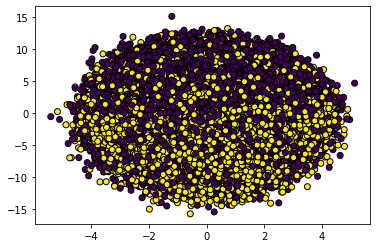

In [9]:
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y, cmap=cm_bright,edgecolors='k')
cm_bright = ListedColormap(['#FF00FF', '#00FF00'])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,edgecolors='k')

In [10]:
# https://github.com/rapidsai/notebooks-contrib/blob/master/getting_started_notebooks/intro_tutorials/07_Introduction_to_XGBoost.ipynb